In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def user_producer_2bar_plot_display(pd, ud): #producer distribution and user distribution
    #TODO add savefig too
    dim = len(pd)
    y_max = max(max(ud), max(pd))

    x1, y1 = np.arange(dim), ud
    x2, y2 = np.arange(dim), pd

    fig, ax = plt.subplots()
    ax.bar(np.array(x1)-0.15, y1, width = 0.3, color='blue')
    ax.set_ylabel('Average User weight', fontsize=16)
    ax.set_xlabel('feature #', fontsize=16)
    plt.ylim(0, y_max)

    ax2 = ax.twinx()
    ax2.bar(np.array(x2)+0.15, y2, width = 0.3, color='red')
    ax2.set_ylabel('Fraction of Producers', fontsize=16)
    plt.ylim(0, y_max)

    plt.xticks(range(dim))
    plt.show()

In [4]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})
# plt.tight_layout(rect=[0, 0.03, 1, 0.85])

### Movielens number of iteration

In [47]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_movielens.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_movielens.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_movielens.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_movielens.csv')

In [48]:
df_lin_det.shape, df_lin_agg.shape

((1600, 5), (40, 5))

In [49]:
df_softmax_det.shape, df_softmax_agg.shape

((1600, 5), (40, 5))

In [8]:
df_lin_det.columns, df_lin_agg.columns

(Index(['dimension', 'num_prod', 'run', 'iters_to_NE', 'NE'], dtype='object'),
 Index(['dimension', 'num_prod', 'mean_iter_to_NE', 'std_iters_to_NE',
        'number_of_uniqueNE'],
       dtype='object'))

In [19]:
group_key = ['dimension', 'num_prod']
cols = group_key + ['iters_to_NE'] 
df_lin_stats = df_lin_det[cols].groupby(group_key).describe().reset_index()

In [25]:
np.all(df_lin_stats[('iters_to_NE',  'mean')] == df_lin_agg['mean_iter_to_NE'])

True

In [29]:
df_5dim_10prod = df_lin_det[(df_lin_det['dimension'] == 5) &  (df_lin_det['num_prod'] == 10)]

In [30]:
df_5dim_10prod['iters_to_NE'].describe()

count    20.000000
mean      3.550000
std       1.356272
min       1.000000
25%       3.000000
50%       3.000000
75%       4.250000
max       6.000000
Name: iters_to_NE, dtype: float64

In [31]:
df_5dim_10prod_agg = df_lin_agg[(df_lin_agg['dimension'] == 5) &  (df_lin_agg['num_prod'] == 10)]

In [34]:
df_d_agg = df_lin_agg[df_lin_agg['dimension'] == 5]
df_d_agg

,dimension,num_prod,mean_iter_to_NE,std_iters_to_NE,number_of_uniqueNE
0,5,10,3.55,1.321930,1
1,5,20,5.90,2.278157,1
2,5,30,8.90,2.233831,1
3,5,40,11.55,2.710627,1
4,5,50,13.65,3.482456,1
5,5,60,15.55,3.980892,1
6,5,70,18.45,4.609501,1
7,5,80,18.60,4.211888,1
8,5,90,22.00,5.656854,1
9,5,100,24.20,6.046487,1


In [11]:
df_lin_agg[df_lin_agg['dimension'] == 5]

,dimension,num_prod,mean_iter_to_NE,std_iters_to_NE,number_of_uniqueNE
0,5,10,3.250,1.355544,1
1,5,20,5.025,1.767590,1
2,5,30,6.700,2.293469,1
3,5,40,8.650,2.894391,1
4,5,50,10.600,3.345146,1
5,5,60,10.200,3.782856,1
6,5,70,13.400,3.923009,1
7,5,80,14.450,4.159026,1
8,5,90,19.000,5.074446,1
9,5,100,17.475,4.748618,1


#### Plot for how increasing the number of producers  across dimensions increases the number of iterations

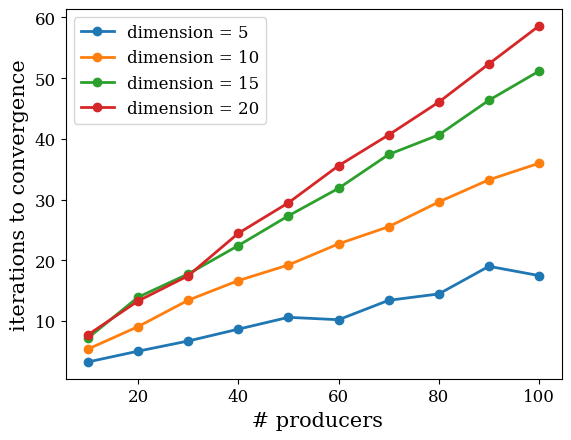

In [50]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_movielens.pdf', bbox_inches='tight')

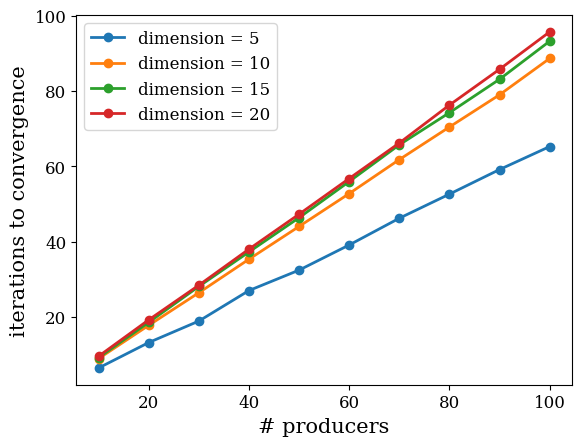

In [51]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_movielens.pdf', bbox_inches='tight')

### Uniform dataset number of iteration

In [53]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_uniform_seed17.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_uniform_seed17.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_uniform_seed17.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_uniform_seed17.csv')

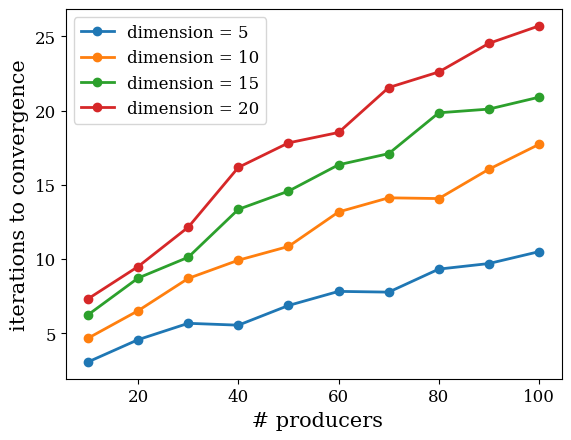

In [55]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_uniform_dataset.pdf', bbox_inches='tight')

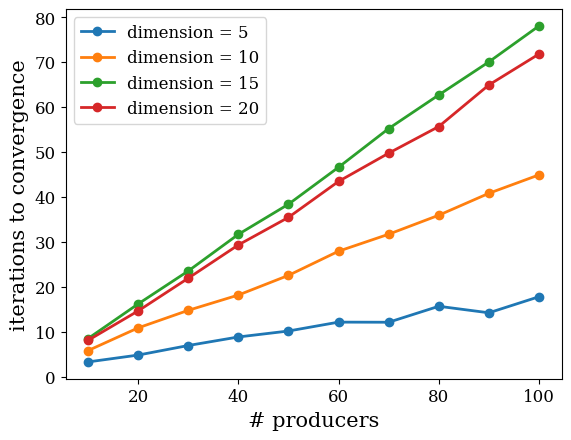

In [56]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_uniform_dataset.pdf', bbox_inches='tight')

### Skewed dataset number of iteration

In [83]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_weighted_seed17.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_weighted_seed17.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_weighted_seed17.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_weighted_seed17.csv')

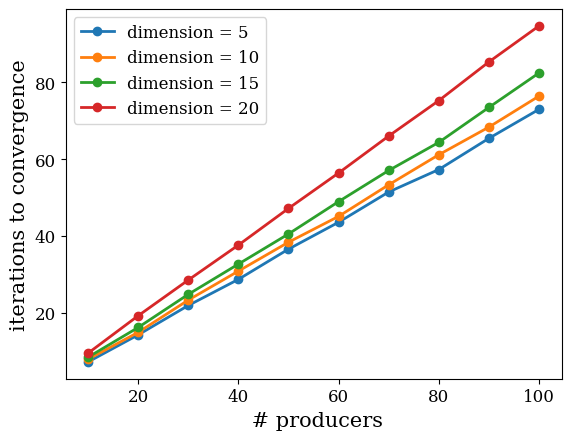

In [84]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_weighted_dataset.pdf', bbox_inches='tight')

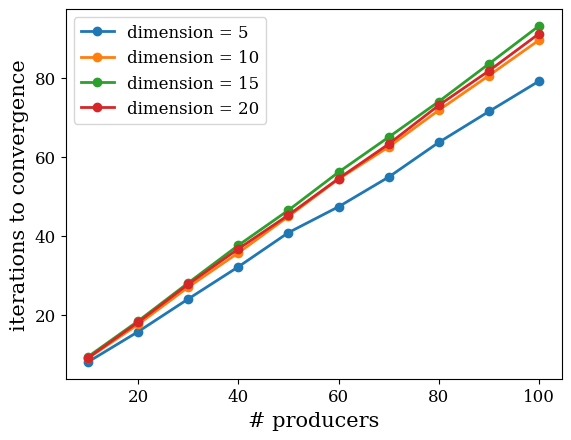

In [85]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_weighted_dataset.pdf', bbox_inches='tight')

## Movielens-100k seed 17 (ignore)

In [86]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_movielens_seed17.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_movielens_seed17.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_movielens_seed17.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_movielens_seed17.csv')

In [88]:
df_lin_det[df_lin_det['converged']==False]

,dimension,num_prod,run,iters_to_NE,NE,converged
1320,20,40,0,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 0. 0. ...,False
1321,20,40,1,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 0. 0. ...,False
1322,20,40,2,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 0. 0. ...,False
1323,20,40,3,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 0. 0. ...,False
1324,20,40,4,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 1. 0. ...,False
1325,20,40,5,9999,[3. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 1. 0. ...,False
1326,20,40,6,9999,[3. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 1. 0. ...,False
1327,20,40,7,9999,[3. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 1. 0. ...,False
1328,20,40,8,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 0. 0. ...,False
1329,20,40,9,9999,[4. 3. 0. 1. 5. 5. 3. 3. 0. 4. 5. 0. 4. 0. 0. ...,False


In [78]:
df_lin_det = df_lin_det[df_lin_det['iters_to_NE'] < 9999]

In [79]:
df_lin_agg = df_lin_agg[df_lin_agg['mean_iter_to_NE'] < 9999]

In [75]:
df_lin_det.shape, df_lin_agg.shape

((1600, 6), (40, 5))

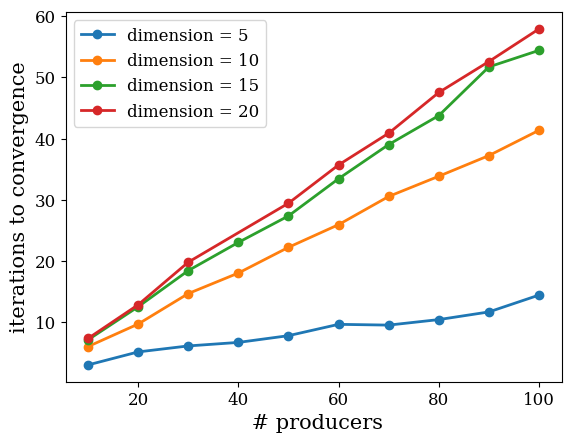

In [81]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_movielens_seed17.pdf', bbox_inches='tight')

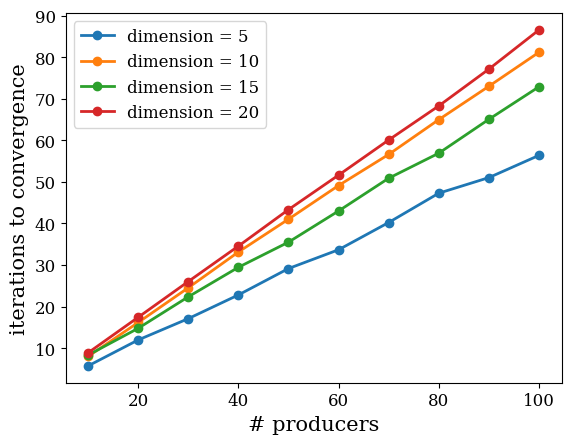

In [82]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_movielens_seed17.pdf', bbox_inches='tight')

## seed = 17 INSIDE the loop plots (paper)

## movielens

In [135]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_movielens_seed17v2.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_movielens_seed17v2.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_movielens_seed17v2.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_movielens_seed17v2.csv')

In [113]:
df_lin_det[df_lin_det['converged']==False]

,dimension,num_prod,run,iters_to_NE,NE,converged


In [114]:
df_softmax_det[df_softmax_det['converged']==False]

,dimension,num_prod,run,iters_to_NE,NE,converged


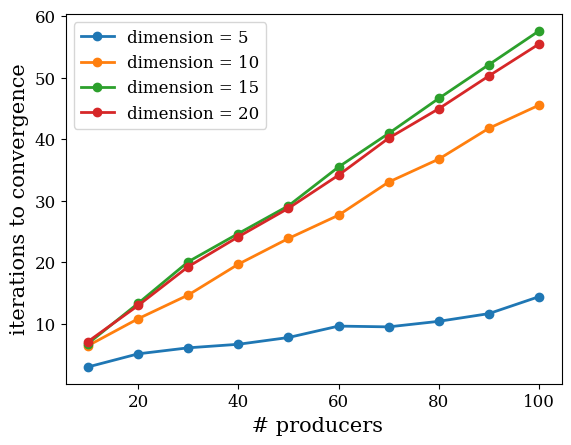

In [115]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_movielens_seed17v2.pdf', bbox_inches='tight')

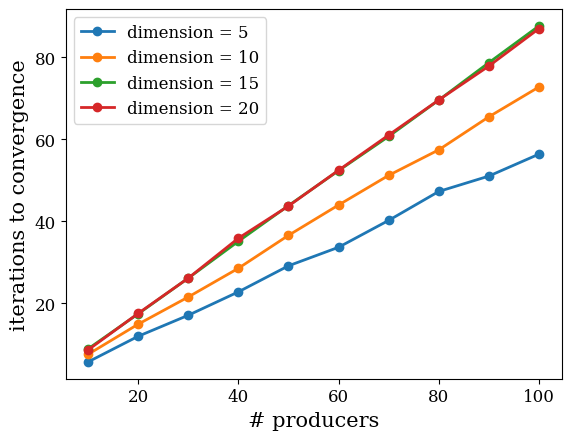

In [116]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_movielens_seed17v2.pdf', bbox_inches='tight')

## uniform, seed 17 inside 

In [5]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_uniform_seed17v2.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_uniform_seed17v2.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_uniform_seed17v2.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_uniform_seed17v2.csv')

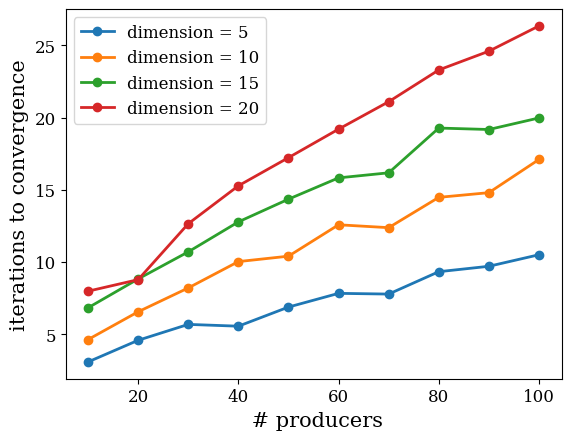

In [6]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_uniform_seed17v2.pdf', bbox_inches='tight')

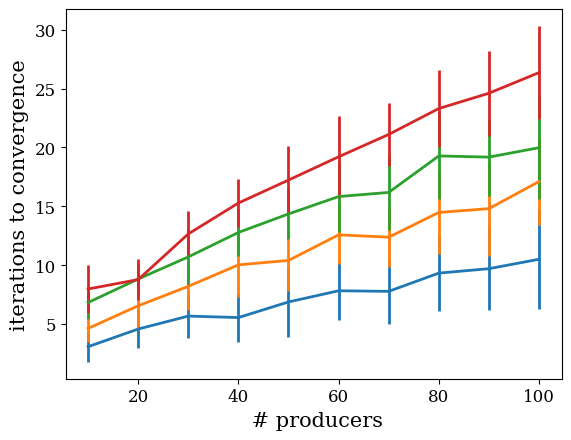

In [10]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.errorbar(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], yerr = df_d_agg['std_iters_to_NE'])
# plt.legend(loc="upper left")
plt.show()
# plt.savefig('num_iter_linear_uniform_seed17v2.pdf', bbox_inches='tight')

In [112]:
df_lin_agg[df_lin_agg['dimension'] == 15], df_lin_agg['num_prod'].unique()

(    dimension  num_prod  mean_iter_to_NE  std_iters_to_NE  number_of_uniqueNE
 20         15        10            6.825         1.429816                   1
 21         15        20            8.825         1.320748                   1
 22         15        30           10.700         2.347339                   1
 23         15        40           12.775         2.006084                   1
 24         15        50           14.350         2.092248                   1
 25         15        60           15.825         3.032223                   1
 26         15        70           16.175         3.153470                   1
 27         15        80           19.275         3.646831                   1
 28         15        90           19.175         3.262572                   1
 29         15       100           19.975         4.378855                   1,
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

In [183]:
import random
import matplotlib.pyplot as plt

def plot_4dim_numiter_errbar(df_agg):
  dims = df_agg['dimension'].unique()
  nprods = df_agg['num_prod'].unique()
  print(dims, nprods)
  
  data_dim5 = {
    'x': nprods,
    'y': df_agg[df_agg['dimension'] == 5]['mean_iter_to_NE'],
    'yerr': df_agg[df_agg['dimension'] == 5]['std_iters_to_NE']}
  
  data_dim10 = {
    'x': nprods+0.3,
    'y': df_agg[df_agg['dimension'] == 10]['mean_iter_to_NE'],
    'yerr': df_agg[df_agg['dimension'] == 10]['std_iters_to_NE']}

  data_dim15 = {
    'x': nprods-0.3,
    'y': df_agg[df_agg['dimension'] == 15]['mean_iter_to_NE'],
    'yerr': df_agg[df_agg['dimension'] == 15]['std_iters_to_NE']}
  
  data_dim20 = {
    'x': nprods+0.5,
    'y': df_agg[df_agg['dimension'] == 20]['mean_iter_to_NE'],
    'yerr': df_agg[df_agg['dimension'] == 20]['std_iters_to_NE']}
  line_styles = [':o',':s' ,':o' , ':s']

# plot
  plt.figure()
# only errorbar
# plt.subplot(211)
# for data in [data_dim5, data_dim10, data_dim15, data_dim20]:
#     plt.errorbar(**data, fmt='o')
# errorbar + fill_between
# plt.subplot(212)
  for idx, data in enumerate([data_dim5, data_dim10, data_dim15, data_dim20]):
      plt.errorbar(**data, fmt=line_styles[idx], capsize=3, capthick=1, elinewidth=1, \
                   alpha=0.9, markersize=4, label = f'dimension = {dims[idx]}')
                   
#       data = {
#           'x': data['x'],
#           'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
#           'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}

  #     plt.fill_between(**data, alpha=.15)
#   handles, labels = plt.get_legend_handles_labels()
#   handles = [h[0] for h in handles]
#   plt.legend(handles, labels, loc='upper left',numpoints=1)
  
  plt.legend(loc= "upper left")
  plt.xlabel("Number of producers")
  plt.ylabel("Number of iterations to NE")

In [193]:
#uniform
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_uniform_seed17v2.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_uniform_seed17v2.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_uniform_seed17v2.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_uniform_seed17v2.csv')

In [196]:
# movielens
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_movielens_seed17v2.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_movielens_seed17v2.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_movielens_seed17v2.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_movielens_seed17v2.csv')

In [206]:
# skewed
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_weighted_seed17v2.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_weighted_seed17v2.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_weighted_seed17v2.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_weighted_seed17v2.csv')

[ 5 10 15 20] [ 10  20  30  40  50  60  70  80  90 100]


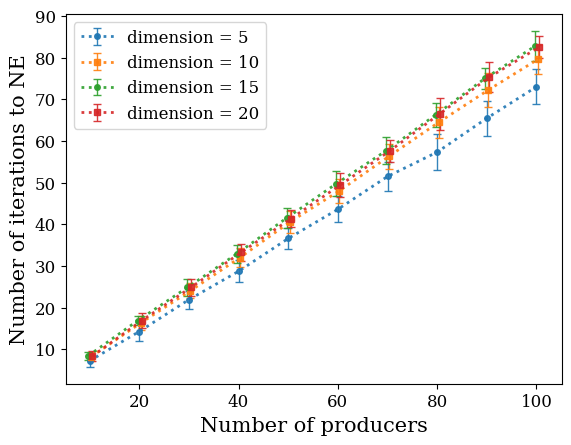

In [207]:
plot_4dim_numiter_errbar(df_lin_agg)

[ 5 10 15 20] [ 10  20  30  40  50  60  70  80  90 100]


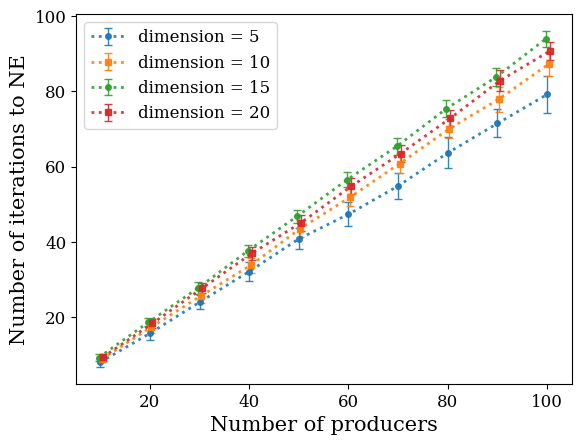

In [208]:
plot_4dim_numiter_errbar(df_softmax_agg)

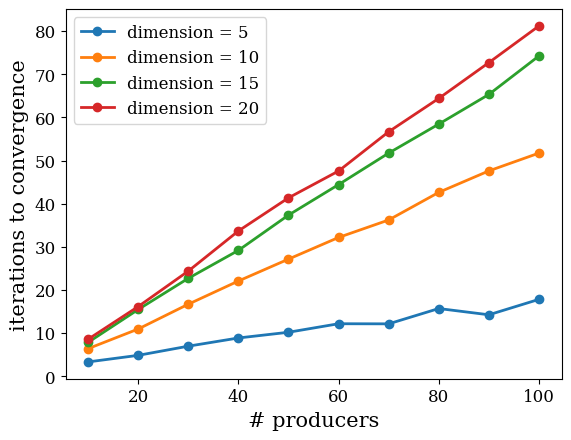

In [129]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')4

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_uniform_seed17v2.pdf', bbox_inches='tight')

## weighted, seed 17 inside 


In [128]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_weighted_seed17v2.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_weighted_seed17v2.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_weighted_seed17v2.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_weighted_seed17v2.csv')

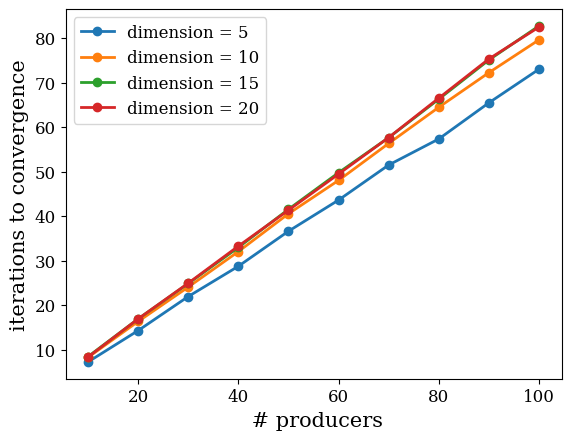

In [131]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_weighted_seed17v2.pdf', bbox_inches='tight')

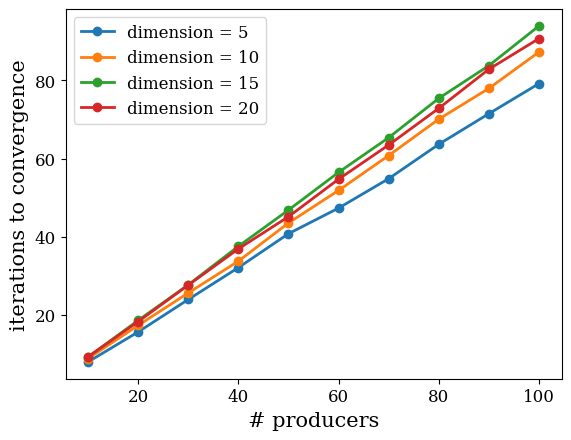

In [132]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_weighted_seed17v2.pdf', bbox_inches='tight')